In [3]:
# %% [markdown]
# # BPI_Challenge_2012C — Event Log EDA (days)
# Explore: schema, activities, cases, durations, next-time deltas, variants, DFG pairs, timelines.

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
PATH = "/ceph/lfertig/Thesis/data/processed/df_bpi_challenge.csv.gz"
CASE_COL = "case:concept:name"
ACT_COL  = "concept:name"
TIME_COL = "time:timestamp"

In [6]:
df = pd.read_csv(PATH, low_memory=False)
print("Shape:", df.shape)
print("Columns:", list(df.columns))
df.info()
display(df.head(25))

Shape: (164321, 5)
Columns: ['case:concept:name', 'concept:name', 'time:timestamp', '@@index', '@@case_index']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164321 entries, 0 to 164320
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   case:concept:name  164321 non-null  int64 
 1   concept:name       164321 non-null  object
 2   time:timestamp     164321 non-null  object
 3   @@index            164321 non-null  int64 
 4   @@case_index       164321 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.3+ MB


,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,173688,A_SUBMITTED,2011-10-01 00:38:44.546000+00:00,0,0
1,173688,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880000+00:00,1,1
2,173688,A_PREACCEPTED,2011-10-01 00:39:37.906000+00:00,2,2
3,173688,A_ACCEPTED,2011-10-01 11:42:43.308000+00:00,3,3
4,173688,O_SELECTED,2011-10-01 11:45:09.243000+00:00,4,4
5,173688,A_FINALIZED,2011-10-01 11:45:09.243000+00:00,5,5
6,173688,O_CREATED,2011-10-01 11:45:11.197000+00:00,6,6
7,173688,O_SENT,2011-10-01 11:45:11.380000+00:00,7,7
8,173688,W_Completeren aanvraag,2011-10-01 11:45:13.917000+00:00,8,8
9,173688,W_Nabellen offertes,2011-10-01 12:17:08.924000+00:00,9,9


In [7]:
# Parse timestamps, basic sanity checks, sort
assert CASE_COL in df.columns and ACT_COL in df.columns and TIME_COL in df.columns, "Expected columns missing."
df[TIME_COL] = pd.to_datetime(df[TIME_COL], utc=True, errors="coerce")
assert df[TIME_COL].notna().any(), "All timestamps are NaT—check the time column."
df = df.sort_values([CASE_COL, TIME_COL]).reset_index(drop=True)

# High-level counts
n_events = len(df)
n_cases  = df[CASE_COL].nunique()
n_acts   = df[ACT_COL].nunique()
print(f"Events: {n_events:,} | Cases: {n_cases:,} | Activities: {n_acts:,}")

Events: 164,321 | Cases: 13,087 | Activities: 23


,count,mean,std,min,50%,90%,95%,99%,max
events_per_case,13087.0,12.556048,11.334441,2.0,7.0,28.0,34.0,48.0,96.0


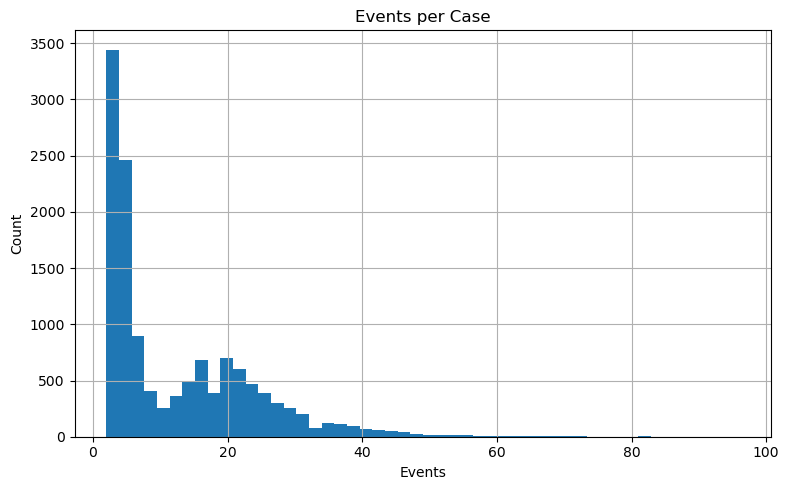

In [8]:
# Events per case
ev_per_case = df.groupby(CASE_COL, sort=False).size().rename("events_per_case")
ev_stats = ev_per_case.describe(percentiles=[0.5, 0.9, 0.95, 0.99])
display(ev_stats.to_frame().T)

plt.figure(figsize=(8,5))
plt.hist(ev_per_case, bins=50)
plt.title("Events per Case"); plt.xlabel("Events"); plt.ylabel("Count")
plt.grid(True); plt.tight_layout(); plt.show()

,count,mean,std,min,50%,90%,95%,99%,max
case_duration_days,13087.0,8.610638,12.073218,0.000001,0.808535,30.451174,31.342019,46.874039,91.413613


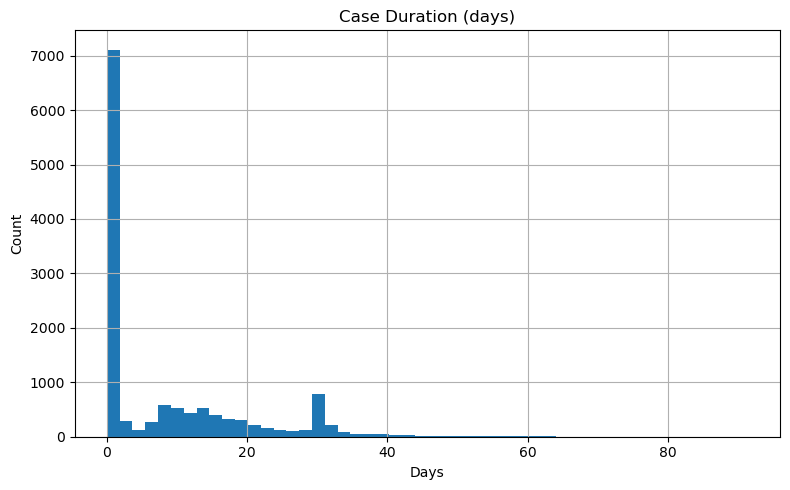

,days
case:concept:name,
179591,91.413613
188485,87.721247
189805,85.876669
183405,84.278776
177516,82.773926
182299,79.687741
176380,79.042903
191644,77.915480
188134,76.946342


,days
case:concept:name,
199597,0.000001
211646,0.000003
191088,0.000003
211934,0.000004
184514,0.000021
175072,0.000022
186487,0.000023
212178,0.000023
207656,0.000024


In [9]:
# Case durations (days): end - start per case
g = df.groupby(CASE_COL, sort=False)[TIME_COL]
case_start = g.min()
case_end   = g.max()
case_duration_days = (case_end - case_start).dt.total_seconds() / 86400.0
dur_stats = case_duration_days.describe(percentiles=[0.5, 0.9, 0.95, 0.99]).rename("case_duration_days")
display(dur_stats.to_frame().T)

plt.figure(figsize=(8,5))
plt.hist(case_duration_days, bins=50)
plt.title("Case Duration (days)"); plt.xlabel("Days"); plt.ylabel("Count")
plt.grid(True); plt.tight_layout(); plt.show()

# Top/bottom cases by duration
display(case_duration_days.sort_values(ascending=False).head(10).to_frame("days"))
display(case_duration_days.sort_values(ascending=True).head(10).to_frame("days"))

,count,mean,std,min,50%,90%,95%,99%,max
next_time_delta_days,151234.0,0.74512,2.158935,0.0,0.000604,2.12231,5.703701,9.047198,30.92262


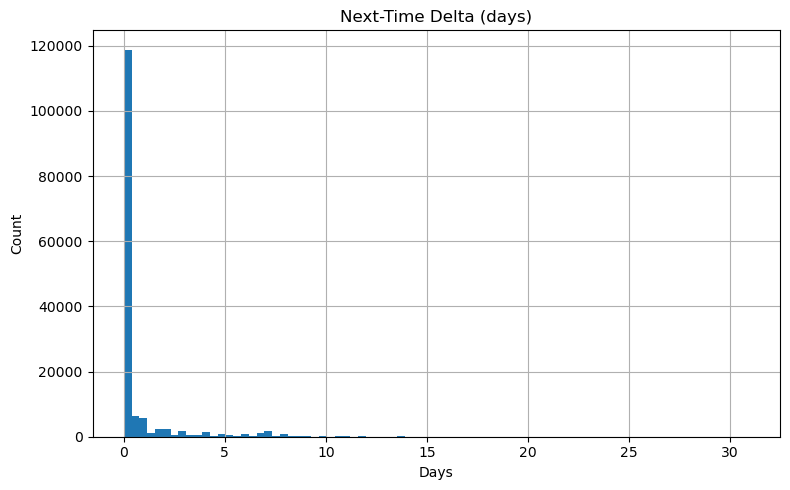

In [10]:
# Next-time deltas (days): within-case differences between consecutive events
df["next_time_delta_days"] = (
    df.groupby(CASE_COL, sort=False)[TIME_COL]
      .diff()
      .dt.total_seconds() / 86400.0
)
ntd = df["next_time_delta_days"].dropna()
ntd_stats = ntd.describe(percentiles=[0.5, 0.9, 0.95, 0.99]).rename("next_time_delta_days")
display(ntd_stats.to_frame().T)

plt.figure(figsize=(8,5))
plt.hist(ntd, bins=80)
plt.title("Next-Time Delta (days)"); plt.xlabel("Days"); plt.ylabel("Count")
plt.grid(True); plt.tight_layout(); plt.show()

,case_starts
concept:name,
A_SUBMITTED,13069
A_PARTLYSUBMITTED,18


,case_ends
concept:name,
A_DECLINED,3430
W_Valideren aanvraag,2747
W_Afhandelen leads,2232
W_Completeren aanvraag,1935
W_Nabellen offertes,1291
A_CANCELLED,657
W_Nabellen incomplete dossiers,450
O_CANCELLED,280
W_Beoordelen fraude,57


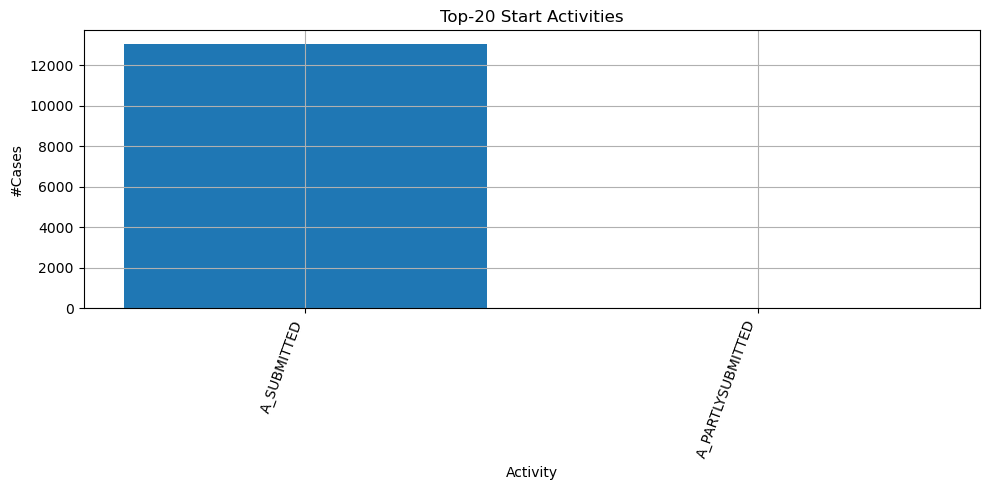

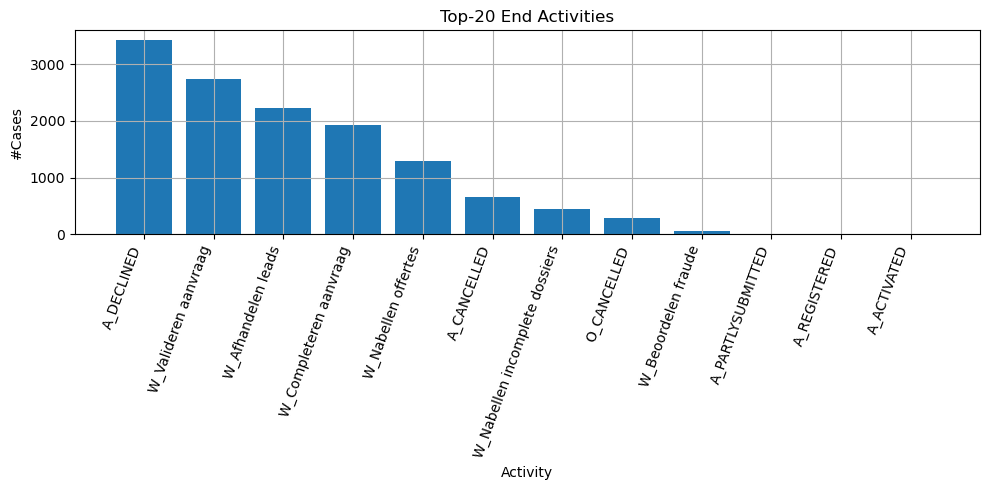

In [11]:
# Start/End activities
first_acts = df.groupby(CASE_COL, sort=False).first()[ACT_COL].value_counts()
last_acts  = df.groupby(CASE_COL, sort=False).last()[ACT_COL].value_counts()
display(first_acts.head(20).to_frame("case_starts"))
display(last_acts.head(20).to_frame("case_ends"))

plt.figure(figsize=(10,5))
plt.bar(first_acts.head(20).index.astype(str), first_acts.head(20).values)
plt.title("Top-20 Start Activities"); plt.xlabel("Activity"); plt.ylabel("#Cases")
plt.xticks(rotation=70, ha="right"); plt.grid(True); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
plt.bar(last_acts.head(20).index.astype(str), last_acts.head(20).values)
plt.title("Top-20 End Activities"); plt.xlabel("Activity"); plt.ylabel("#Cases")
plt.xticks(rotation=70, ha="right"); plt.grid(True); plt.tight_layout(); plt.show()

,from,to,count
0,W_Nabellen offertes,W_Nabellen offertes,13506
1,A_SUBMITTED,A_PARTLYSUBMITTED,13059
2,W_Completeren aanvraag,W_Completeren aanvraag,12604
3,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,8605
4,O_CREATED,O_SENT,7018
5,A_PARTLYSUBMITTED,A_PREACCEPTED,6949
6,A_PARTLYSUBMITTED,A_DECLINED,5287
7,O_SENT,W_Completeren aanvraag,5005
8,W_Completeren aanvraag,W_Nabellen offertes,3551
9,O_SENT_BACK,W_Nabellen offertes,3248


/tmp/ipykernel_3988509/1736435071.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.xticks(rotation=70, ha="right"); plt.grid(True); plt.tight_layout(); plt.show()


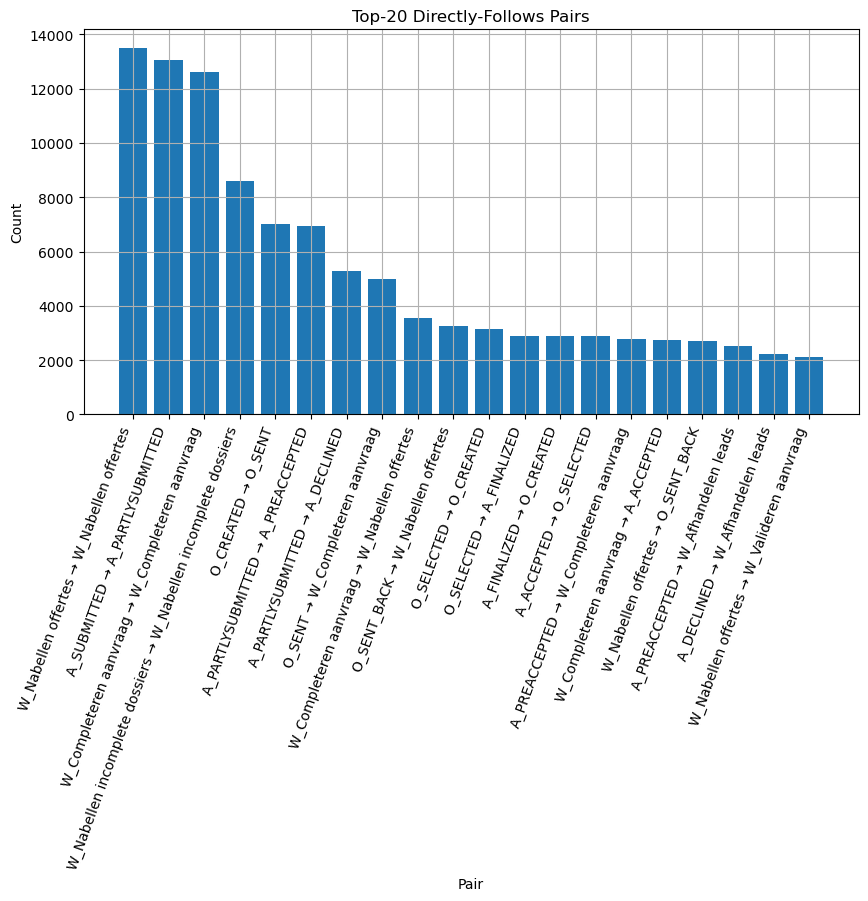

In [12]:
# Directly-Follows Graph (DFG) counts: bigrams within cases
def dfg_counts(df, case_col, act_col):
    pairs = []
    for _, g in df.groupby(case_col, sort=False):
        acts = g[act_col].dropna().tolist()
        if len(acts) > 1:
            pairs.extend(zip(acts[:-1], acts[1:]))

    s = pd.Series(pairs)
    vc = s.value_counts()  # index: tuples like ('A','B'), values: counts

    # Make it a MultiIndex so we can name the levels and reset cleanly
    vc.index = pd.MultiIndex.from_tuples(vc.index, names=["from", "to"])
    dfg_df = vc.reset_index(name="count")
    return dfg_df

dfg_df = dfg_counts(df, CASE_COL, ACT_COL)
display(dfg_df.head(20))

plt.figure(figsize=(10,5))
top_pairs = dfg_df.head(20)
labels = [f"{a} \u2192 {b}" for a, b in zip(top_pairs["from"], top_pairs["to"])]
plt.bar(labels, top_pairs["count"].values)
plt.title("Top-20 Directly-Follows Pairs"); plt.xlabel("Pair"); plt.ylabel("Count")
plt.xticks(rotation=70, ha="right"); plt.grid(True); plt.tight_layout(); plt.show()

/tmp/ipykernel_3988509/3733048281.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(case_variant)


,count,cumulative_coverage
A_SUBMITTED → A_PARTLYSUBMITTED → A_DECLINED,3422,0.261481
A_SUBMITTED → A_PARTLYSUBMITTED → A_DECLINED → W_Afhandelen leads,1858,0.403454
A_SUBMITTED → A_PARTLYSUBMITTED → W_Afhandelen leads → A_DECLINED → W_Afhandelen leads,271,0.424161
A_SUBMITTED → A_PARTLYSUBMITTED → A_PREACCEPTED → W_Afhandelen leads → A_DECLINED → W_Completeren aanvraag,209,0.440131
A_SUBMITTED → A_PARTLYSUBMITTED → A_PREACCEPTED → A_DECLINED → W_Completeren aanvraag,157,0.452128
A_SUBMITTED → A_PARTLYSUBMITTED → A_PREACCEPTED → A_CANCELLED → W_Completeren aanvraag,136,0.462520
A_SUBMITTED → A_PARTLYSUBMITTED → A_PREACCEPTED → W_Afhandelen leads → W_Completeren aanvraag → A_DECLINED → W_Completeren aanvraag,126,0.472148
A_SUBMITTED → A_PARTLYSUBMITTED → A_PREACCEPTED → W_Completeren aanvraag → A_DECLINED → W_Completeren aanvraag,93,0.479254
A_SUBMITTED → A_PARTLYSUBMITTED → A_PREACCEPTED → W_Completeren aanvraag → A_CANCELLED → W_Completeren aanvraag,87,0.485902
A_SUBMITTED → A_PARTLYSUBMITTED → A_PREACCEPTED → W_Afhandelen leads → W_Completeren aanvraag → W_Completeren aanvraag → A_DECLINED → W_Completeren aanvraag,74,0.491557


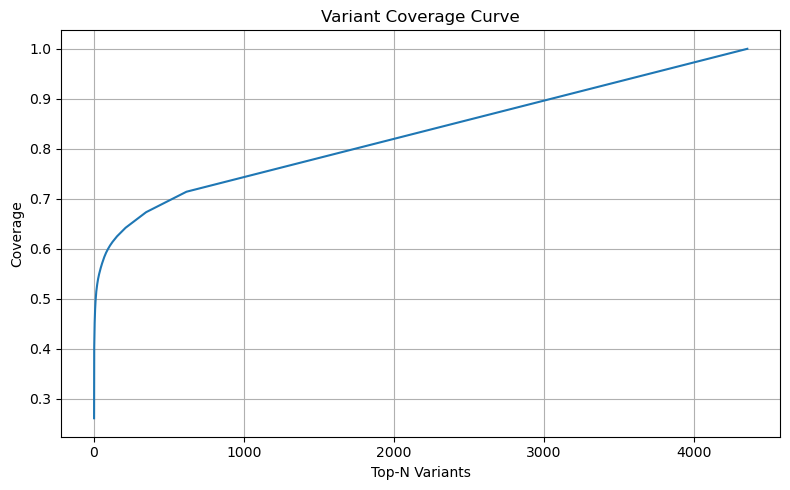

In [13]:
# Variants (activity sequences per case)
def case_variant(g):
    return " → ".join(g[ACT_COL].tolist())

variants = (
    df.groupby(CASE_COL, sort=False)
      .apply(case_variant)
      .value_counts()
)
coverage = (variants.cumsum() / variants.sum()).rename("cumulative_coverage")
top_variants = pd.concat([variants.rename("count"), coverage], axis=1).head(20)
display(top_variants)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(coverage)+1), coverage.values)
plt.title("Variant Coverage Curve"); plt.xlabel("Top-N Variants"); plt.ylabel("Coverage")
plt.grid(True); plt.tight_layout(); plt.show()

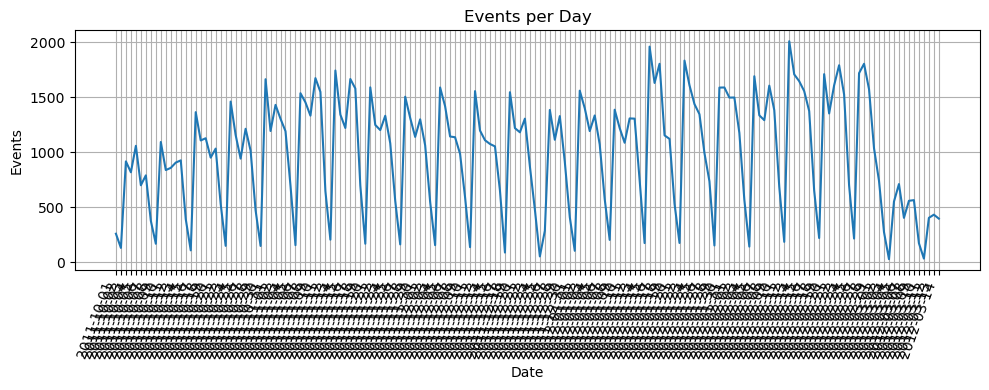

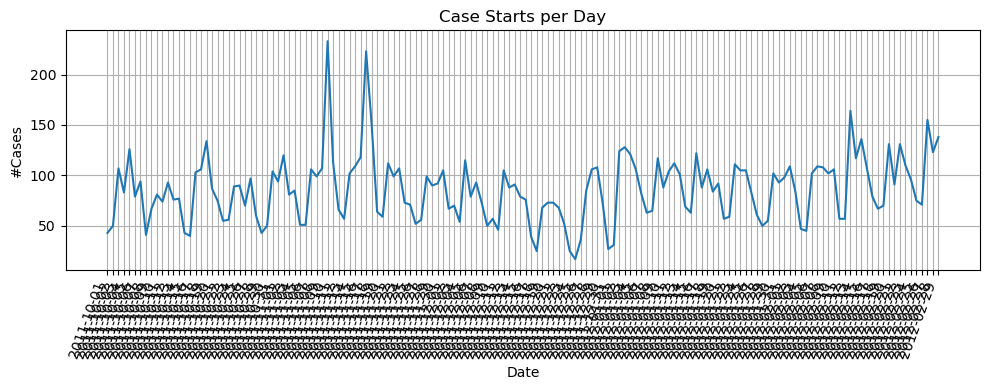

In [14]:
# Timeline views (event counts per day; case starts per day)
df["event_date"] = df[TIME_COL].dt.tz_convert(None).dt.date
events_per_day = pd.Series(df["event_date"]).value_counts().sort_index()
plt.figure(figsize=(10,4))
plt.plot(events_per_day.index.astype(str), events_per_day.values)
plt.title("Events per Day"); plt.xlabel("Date"); plt.ylabel("Events")
plt.xticks(rotation=70, ha="right"); plt.grid(True); plt.tight_layout(); plt.show()

case_start_date = case_start.dt.tz_convert(None).dt.date
starts_per_day = case_start_date.value_counts().sort_index()
plt.figure(figsize=(10,4))
plt.plot(starts_per_day.index.astype(str), starts_per_day.values)
plt.title("Case Starts per Day"); plt.xlabel("Date"); plt.ylabel("#Cases")
plt.xticks(rotation=70, ha="right"); plt.grid(True); plt.tight_layout(); plt.show()

In [15]:
# Missing values overview
na = df.isna().sum().sort_values(ascending=False)
display(na.to_frame("n_missing").T)

,next_time_delta_days,case:concept:name,concept:name,time:timestamp,@@index,@@case_index,event_date
n_missing,13087,0,0,0,0,0,0


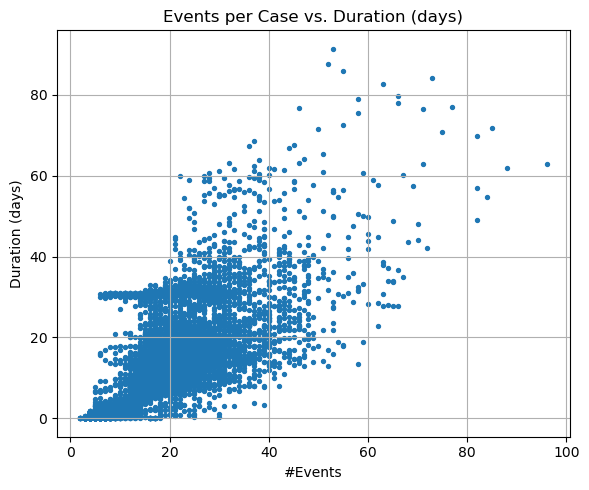

In [16]:
# Correlate events-per-case vs. duration (days) (quick scatter in matplotlib)
aligned = pd.DataFrame({
    "events_per_case": ev_per_case,
    "duration_days": case_duration_days
}).dropna()

plt.figure(figsize=(6,5))
plt.scatter(aligned["events_per_case"], aligned["duration_days"], s=8)
plt.title("Events per Case vs. Duration (days)")
plt.xlabel("#Events"); plt.ylabel("Duration (days)")
plt.grid(True); plt.tight_layout(); plt.show()

In [17]:
print("EDA complete.")

EDA complete.
